In [29]:
import pandas as pd
import matplotlib as plt
import numpy as np
import os
import matplotlib.pyplot as plt 
import seaborn as sns

In [30]:
df = pd.read_csv('Resources/fake_job_postings_cleaned_v2.csv')
df.head()

,Unnamed: 0,title,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Country,City,State
0,0,Marketing Intern,Marketing,Were Food52 and weve created a groundbreaking ...,Food52 a fastgrowing James Beard Awardwinning ...,Experience with content management systems a m...,none,0,1,0,Other,Internship,none,none,Marketing,0,US,NY,New York
1,1,Customer Service - Cloud Video Production,Success,90 Seconds the worlds Cloud Video Production S...,OrganisedFocusedVibrantAwesomeDo you have a pa...,What we expect from youYour key responsibility...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,none,Marketing and Advertising,Customer Service,0,NZ,none,Auckland
2,2,Commissioning Machinery Assistant (CMA),none,Valor Services provides Workforce Solutions th...,Our client located in Houston is actively seek...,Implement precommissioning and commissioning p...,none,0,1,0,none,none,none,none,none,0,US,IA,Wever
3,3,Account Executive - Washington DC,Sales,Our passion for improving quality of life thro...,THE COMPANY ESRIEnvironmental Systems Research...,EDUCATION Bachelors or Masters in GIS business...,Our culture is anything but corporatewe have a...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,DC,Washington
4,4,Bill Review Manager,none,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE Itemization Review ManagerLOCATION F...,QUALIFICATIONSRN license in the State of Texas...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,FL,Fort Worth


## Data structure analysis

In [4]:
df.shape

(17880, 18)

In [5]:
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [6]:
count_na = df.isna().sum()
count_na

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [7]:
total_jobs = len(df.index)

In [8]:
# split fraud and non fraud into counts
fraud_df = df[df['fraudulent'] == 1]
non_fraud_df = df[df['fraudulent'] == 0]

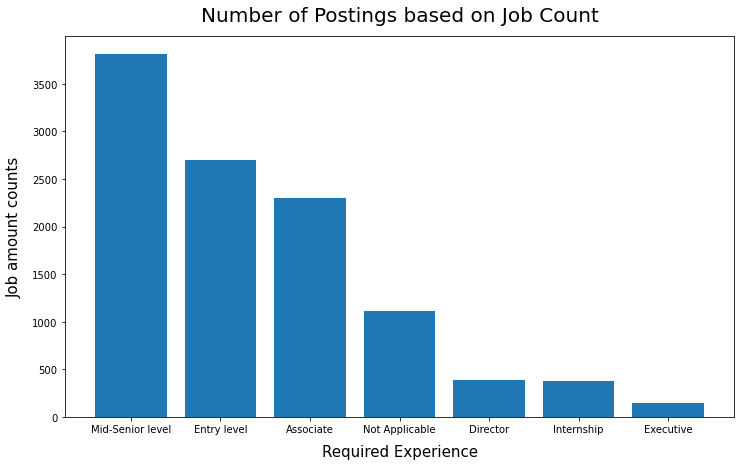

In [24]:
# job postings by level
experience = dict(df.required_experience.value_counts())
figure = plt.figure(figsize = (12,7))
plt.bar(experience.keys(), experience.values())
plt.title('Number of Postings based on Job Count', pad=15, size=20)
plt.xlabel('Required Experience', size=15, labelpad=10)
plt.ylabel('Job amount counts',size=15, labelpad=10)
plt.xticks()
plt.show()

17014 866 17880


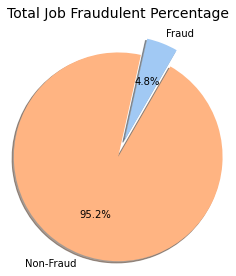

In [25]:
# counts of df
total_count = len(df.index)
fraud_count = len(fraud_df.index)
non_fraud_count = len(non_fraud_df.index)

print(non_fraud_count, fraud_count, total_count)

# pie chart - % fraud vs non fraud
labels = 'Fraud', 'Non-Fraud'
data = [fraud_count, non_fraud_count]
colors = sns.color_palette('pastel')

# customizations
explode = [0.2,0]
plt.title('Total Job Fraudulent Percentage', pad=30, fontsize=14)

plot = plt.pie(data, labels=labels, explode = explode, shadow = True, autopct='%1.1f%%',startangle=60, radius=1.2, colors=colors)


dict_keys(['none', "Bachelor's Degree", 'High School or equivalent', 'Unspecified', "Master's Degree", 'Associate Degree', 'Certification', 'Some College Coursework Completed', 'Professional', 'Vocational', 'Some High School Coursework', 'Doctorate', 'Vocational - HS Diploma', 'Vocational - Degree'])

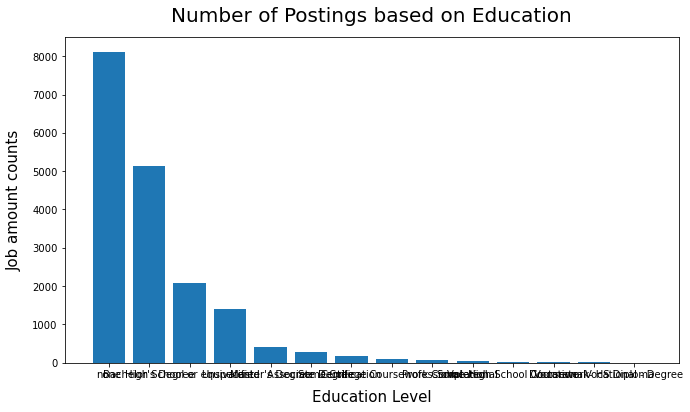

In [34]:
# required education

education = dict(df.required_education.value_counts())
education_bar = plt.figure(figsize = (11,6))
plt.bar(education.keys(), education.values())
plt.title('Number of Postings based on Education', pad=15, size=20)
plt.xlabel('Education Level', size=15, labelpad=10)
plt.ylabel('Job amount counts',size=15, labelpad=10)
plt.xticks()

education.keys()
